# **Perkenalan**

Nama : Agus Susanto

Batch : RMT-26

Objective : Membuat machine learning untuk melakukan prediksi harga platform ride-hailing dengan metode regresi linear

# **Conceptual Problems**

Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! (Gunakan bahasa anda sendiri)

Asumsi yang di pakai dalam linear regression adalah :
1. Linearitas, data independen mempunyai korelasi atau pengaruh terhadap data target
2. Homoskedisitas, tidak adanya data outlier pada setiap variabel di data independent
3. Multikolineariti, tidak adanya hubungan ketergantungan antara variabel data independent
4. Multivariate Normality, bahwa data harus mempunyai persebaran yang residu/rata
5. No auto-correlation, tidak ada korelasi yang signifikan antara value dari suatu variabel dengan value sebelumnya atau sesudahnya dalam data yang sama melalui waktu atau dataset

# **Import Libraries**

In [1]:
#Install library feature-engine
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 3.2 MB/s eta 0:00:00


In [48]:
#Library pengolahan data
import pandas as pd
import numpy as np

#Library untuk membuat grafik
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk handling outlier
from feature_engine.outliers import Winsorizer

#Librariy untuk uji korelasi antara 2 numeric data
from scipy.stats import pearsonr

#Library untuk melakukan split dataframe ke data train dan test
from sklearn.model_selection import train_test_split

#Library untuk encoding data categorical ke numeric
from sklearn.preprocessing import OneHotEncoder

#Library untuk melakukan scaling numeric data
from sklearn.preprocessing import MinMaxScaler, RobustScaler

#Library untuk model machine learning
from sklearn.linear_model import LinearRegression

#Library untuk melakukan evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

#Library untuk melakukan transformasi pada kolom dalam dataset
from sklearn.compose import ColumnTransformer

#Library untuk membuat pipeline agar proses alur kerja jadi satu
from sklearn.pipeline import Pipeline

#Library polynomial and interaction features
from sklearn.preprocessing import PolynomialFeatures

#Library untuk menguci no autocorrelaction
from statsmodels.stats.stattools import durbin_watson


# **Data Loading**

In [3]:
#Import data dari csv
df = pd.read_csv('/content/drive/MyDrive/DATA PENTING PRIBADI/Hacktiv/GC4/rideshare_kaggle.csv')

In [ ]:
#Melihat 5 data teratas
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# **Exploratory Data Analysis (EDA)**

In [4]:
#Menampikan detail info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Pada kolom price di temukan adanya missing value yang perlu di handling

In [103]:
#Menghitung data duplicate pada dataset
print('Total data duplicated adalah : ', df.duplicated().sum())

Total data duplicated adalah :  0


Tidak ditemukan data duplicate pada data set

In [ ]:
#Menghitung nilai maksimum harga
print('Harga tertinggi adalah ', df.price.max())
#Menghitung nilai minimum harga
print('Harga terendah adalah ', df.price.min())
#Menghitung nilai rata-rata harga
print('rata-rata Harga adalah ', df.price.mean().round(2))

Harga tertinggi adalah  97.5
Harga terendah adalah  2.5
rata-rata Harga adalah  16.55


In [ ]:
#Menampilkan ukuran dataset
df.shape

(693071, 57)

Total data yang akan kita proses adalah 693071 baris dan 57 Kolom

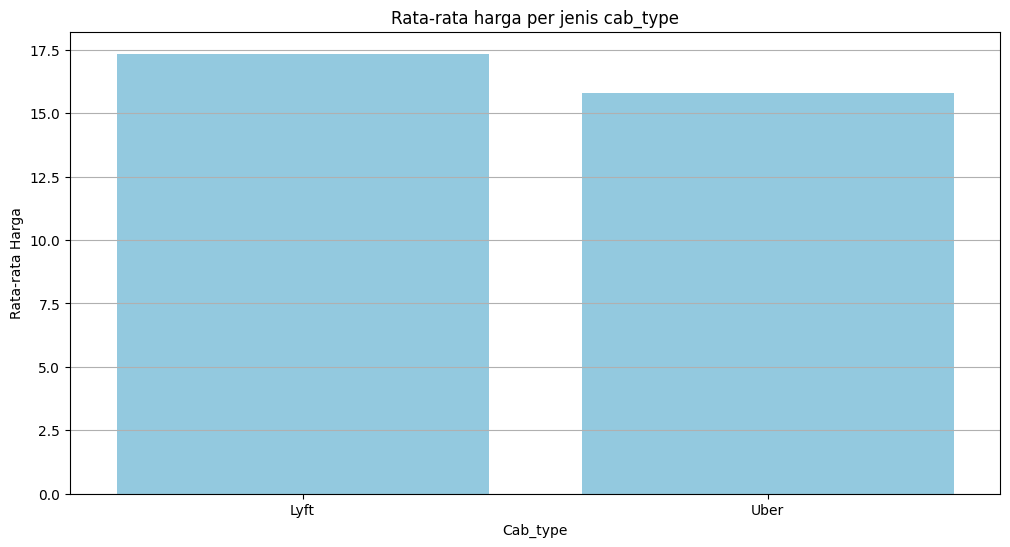

In [98]:
daysum = df.groupby('cab_type')['price'].mean().reset_index()

# Membuat diagram batang
plt.figure(figsize=(12, 6))
# sns.barplot(daysum['distance'], daysum['price'], color='skyblue')
sns.barplot(data=daysum, x='cab_type', y='price', color='skyblue')
plt.title('Rata-rata harga per jenis cab_type')
plt.xlabel('Cab_type')
plt.ylabel('Rata-rata Harga')
# plt.xticks(daysum['surge_multiplier'], rotation=45)  # Hanya menampilkan tanggal dari 1-30
plt.grid(axis='y')
plt.show()

Cab_type dengan jenis Lyft mempunyai rata-rata harga lebih tinggi dari pada type uber

In [99]:
#Membuat tabel rangkuman harga menurut name dan cab_type
df.groupby(['cab_type', 'product_id', 'name'])['price'].agg(['sum', np.mean, 'min', 'max'])

sum  \
cab_type product_id                           name                       
Lyft     lyft                                 Lyft           492413.68   
         lyft_line                            Shared         308929.50   
         lyft_lux                             Lux Black     1181605.55   
         lyft_luxsuv                          Lux Black XL  1656124.55   
         lyft_plus                            Lyft XL        784375.20   
         lyft_premier                         Lux            910509.50   
Uber     55c66225-fbe7-4fd5-9072-eab1ece5e23e UberX          537997.00   
         6c84fd89-3f11-4782-9b50-97c468b19529 Black         1130758.00   
         6d318bcc-22a3-4af6-bddd-b409bfce1546 Black SUV     1668679.50   
         6f72dfc5-27f1-42e8-84db-ccc7a75f6969 UberXL         863803.00   
         8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a Taxi                0.00   
         997acbb5-e102-41e1-b155-9df7de0a73f2 UberPool       482184.00   
         9a0e7b09-b92b-4c41-9779-2ad22b4d779d WAV            538013.50   

                                                                 mean   min  \
cab_type product_id                           name                            
Lyft     lyft                                 Lyft           9.610885   5.0   
         lyft_line                            Shared         6.029893   2.5   
         lyft_lux                             Lux Black     23.062468  16.5   
         lyft_luxsuv                          Lux Black XL  32.324086  26.0   
         lyft_plus                            Lyft XL       15.309363   9.0   
         lyft_premier                         Lux           17.771240  10.5   
Uber     55c66225-fbe7-4fd5-9072-eab1ece5e23e UberX          9.765074   6.0   
         6c84fd89-3f11-4782-9b50-97c468b19529 Black         20.523786  13.5   
         6d318bcc-22a3-4af6-bddd-b409bfce1546 Black SUV     30.286763  23.0   
         6f72dfc5-27f1-42e8-84db-ccc7a75f6969 UberXL        15.678144   8.0   
         8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a Taxi                NaN   NaN   
         997acbb5-e102-41e1-b155-9df7de0a73f2 UberPool       8.752500   4.5   
         9a0e7b09-b92b-4c41-9779-2ad22b4d779d WAV            9.765019   6.0   

                                                             max  
cab_type product_id                           name                
Lyft     lyft                                 Lyft          38.5  
         lyft_line                            Shared        22.5  
         lyft_lux                             Lux Black     75.0  
         lyft_luxsuv                          Lux Black XL  97.5  
         lyft_plus                            Lyft XL       65.0  
         lyft_premier                         Lux           55.0  
Uber     55c66225-fbe7-4fd5-9072-eab1ece5e23e UberX         44.0  
         6c84fd89-3f11-4782-9b50-97c468b19529 Black         68.5  
         6d318bcc-22a3-4af6-bddd-b409bfce1546 Black SUV     89.5  
         6f72dfc5-27f1-42e8-84db-ccc7a75f6969 UberXL        76.0  
         8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a Taxi           NaN  
         997acbb5-e102-41e1-b155-9df7de0a73f2 UberPool      42.5  
         9a0e7b09-b92b-4c41-9779-2ad22b4d779d WAV           44.0

1.   Dari tabel product_id dan name mempunyai value yang saling berkorelasi sehingga kedepan salah satu tabel akan di hapus
2.   Lix Black XL mempunyai rata-rata harga tertinggi untuk jenis Lyft dan Black SUV untuk jenis Uber mempunyai rata-rata harga tertinggi



# **Feature Engineering**

## **Data Split**

In [5]:
#Split data X & y

X=df.drop(['price'], axis=1)
y=df['price']

In [6]:
#Split data X dan y menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# melihat data train
X_train

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
295098,c4b2d704-45a0-4911-9a15-386a39bbfd2b,1.544397e+09,23,9,12,2018-12-09 23:08:31,America/New_York,South Station,Theatre District,Uber,...,0.0003,1544374800,15.95,1544353200,35.97,1544378400,14.08,1544356800,29.83,1544378400
75594,8d84b6ea-0b71-45ec-9910-b1e3d8e18be3,1.543816e+09,5,3,12,2018-12-03 05:43:04,America/New_York,Financial District,Haymarket Square,Lyft,...,0.0004,1543852800,42.83,1543896000,57.52,1543852800,39.65,1543896000,56.85,1543852800
41271,8c793d15-5fda-4e5c-84a2-77c2484b315b,1.543865e+09,19,3,12,2018-12-03 19:23:04,America/New_York,South Station,Theatre District,Lyft,...,0.0004,1543852800,42.83,1543896000,57.52,1543852800,39.65,1543896000,56.85,1543852800
304967,2a186286-e9ee-4dce-8b49-a559551121b0,1.543399e+09,9,28,11,2018-11-28 09:58:36,America/New_York,Financial District,Haymarket Square,Uber,...,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.77,1543438800
117673,41d984a5-ddfc-412d-a170-c3389f54f5bd,1.545132e+09,11,18,12,2018-12-18 11:15:06,America/New_York,Back Bay,South Station,Lyft,...,0.0028,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.92,1545109200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0637705e-8a58-4c8b-81cc-825cbd4ef191,1.544800e+09,15,14,12,2018-12-14 15:00:06,America/New_York,Fenway,Financial District,Uber,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
365838,0f3e15db-1276-4643-b318-c28e5a07e1b7,1.543207e+09,4,26,11,2018-11-26 04:40:56,America/New_York,Haymarket Square,Financial District,Lyft,...,0.1459,1543161600,40.73,1543122000,46.28,1543154400,38.28,1543136400,43.21,1543186800
131932,2e54081e-dfa9-4537-a232-5dc0c441a12b,1.543616e+09,22,30,11,2018-11-30 22:13:07,America/New_York,South Station,Financial District,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
671155,a090a9ee-0a68-4ae9-8c85-d83763311e53,1.544955e+09,10,16,12,2018-12-16 10:05:06,America/New_York,West End,Northeastern University,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800


## **Handling Outlier**

In [ ]:
#Melihat nilai uniq dari tabel X_train
X_train.nunique()

id                             554456
timestamp                       35232
hour                               24
day                                17
month                               2
datetime                        31348
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime                       25
visibility  

In [8]:
#Mengamil nama kolom dengan tipe int dan float
num_col = X_train.select_dtypes(include=['int64','float64']).columns.tolist()

#Remove nama kolom karena data berisi kategori ordinal
num_col.remove('surge_multiplier')
num_col.remove('precipIntensity')
num_col.remove('precipProbability')
num_col.remove('uvIndex')
num_col.remove('hour')
num_col.remove('day')
num_col.remove('month')

#Menampilkan data
num_col

['timestamp',
 'distance',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

In [9]:
# Dictionary sementara
skewdf = []

for i in num_col:

    '''
    Looping untuk melakukan perhitungan skewness dari data numeric
    dan memasukan nya kedalam dictionary sementara
    '''

    #Menghitung skewness
    skew_val = X_train[i].skew()

    #Round data
    round_skew = round(skew_val, 4)

    #Condition untuk nilai skewness
    skewness_category = ''
    if skew_val > 1 or skew_val < -1:
      #Jika nilai skewness >1 atau <-1 maka skewness Extreme
        skewness_category = 'Extreme'
    elif skew_val >= 0.5  or skew_val <= -0.5:
      #Jika nilai skewness >=0.5 atau <=-0.5 maka skewness moderate
        skewness_category = 'Moderate'
    else:
      #jika nilai skewness di luar dari angka else sebelum nya maka distibusi normal
        skewness_category = 'Normal'

    # membuat data setiap hasil dari looping dan condition
    skcat = pd.DataFrame({'Feature': [i], 'Skewness': [skew_val], 'Skewness Category': [skewness_category]})

    # menambahkan data hasil looping dan condition ke dictionary sementara
    skewdf.append(skcat)


# Concatenate menggabungkan semua dataframe looping ke satu dataframe
skewness_df = pd.concat(skewdf, ignore_index=True)

# menampilkan hasil dataframe
skewness_df

,Feature,Skewness,Skewness Category
0,timestamp,0.432795,Normal
1,distance,0.838325,Moderate
2,latitude,-2.114243,Extreme
3,longitude,-0.355397,Normal
4,temperature,-0.609746,Moderate
5,apparentTemperature,-0.394433,Normal
6,humidity,-0.075012,Normal
7,windSpeed,0.451330,Normal
8,windGust,1.118576,Extreme
9,windGustTime,0.439231,Normal


Bedasarkan hasil test skewness ada beberapa kolom yang mempunyai outlier moderate sampai extreeme, sehingga akan kita handle dengan capping

In [10]:
#Fungsi membuat grafik untuk melihat outlier
def diagnostic_plots(data, variable):
    # Ukuran grafik
    plt.figure(figsize=(16, 4))

    # membuat histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # membuat boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    #Menampilkan grafik
    plt.show()

In [11]:
#Handling awal satu kolom dengan category normal distribution
wz = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['latitude'])

#Fit hasil handling ke dataframe X_train
X_train_capped = wz.fit_transform(X_train)

#Fit hasil handling ke dataframe X_test
X_test_capped = wz.transform(X_test)

In [12]:
#Hapus baris latitude yang sudah di handling data outlier agar tidak berulang di looping kedepan
skewness_df = skewness_df.drop(5)

latitude - Before Capping


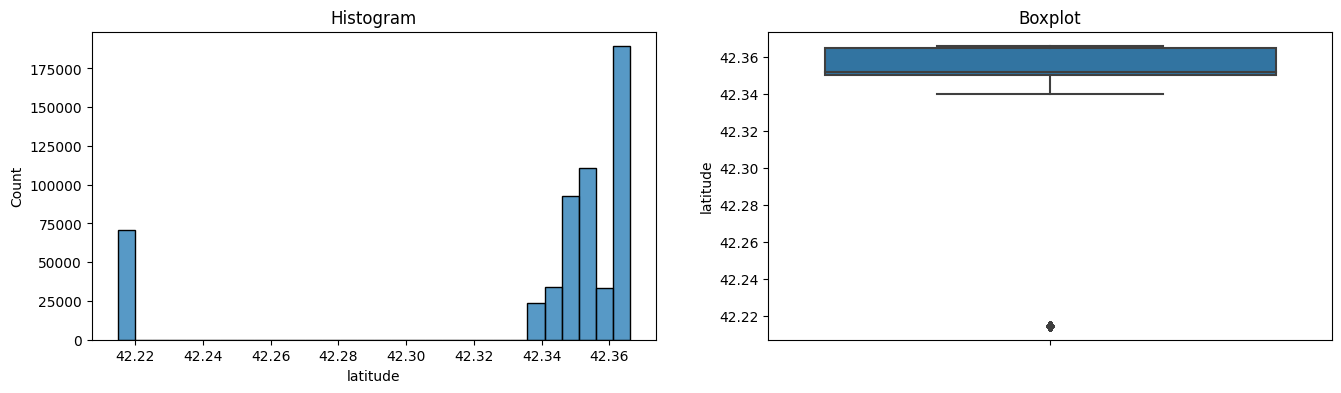

latitude - after Capping


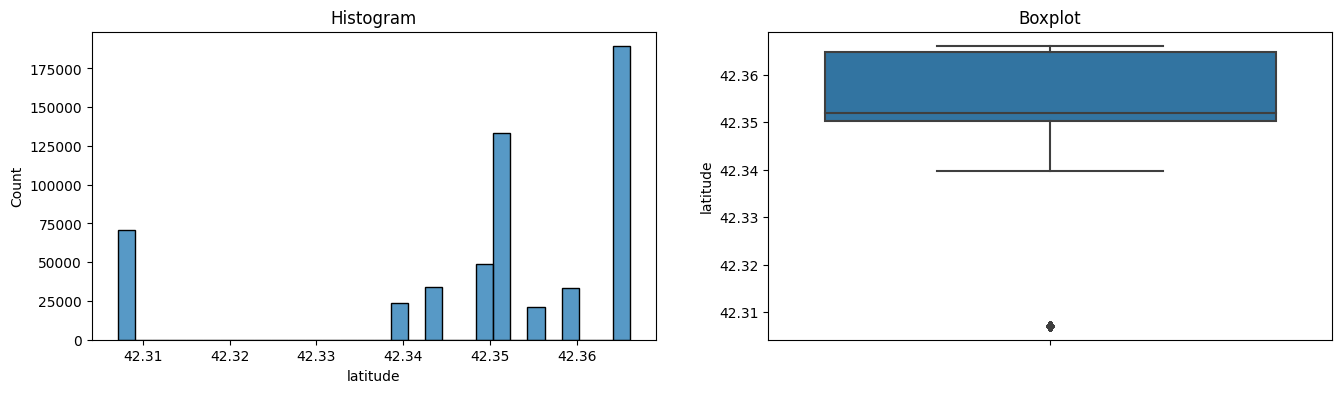

In [13]:
#Menampilkan grafik persebaran data latitude sebelum capping
print('latitude - Before Capping')
diagnostic_plots(X_train, 'latitude')

#Menampilkan grafik persebaran data latitude sebelum capping
print('latitude - after Capping')
diagnostic_plots(X_train_capped, 'latitude')

In [14]:
#Skweness sebekum capping
print('Skew Before Capping : ', X_train.latitude.skew())
#Skweness sesudah capping
print('Skew After Capping : ', X_train_capped.latitude.skew())

Skew Before Capping :  -2.114242927161079
Skew After Capping :  -1.4883389751013885


In [15]:
#Mengambil nama kolom dalam dataframe uji skewness dengan category skewness Normal
normalcol = skewness_df.loc[skewness_df['Skewness Category'] == 'Normal', 'Feature'].tolist()
for i in normalcol:
  '''
  Looping untuk melakukan handling outlier dengan distribusi normal
  '''
  #Handling outlier
  wz = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=[i])
  #Fit hasil handling ke x_train
  X_train_capped = wz.fit_transform(X_train_capped)
  #Fit hasil handling ke x_test
  X_test_capped = wz.transform(X_test_capped)

In [16]:
#Mengambil nama kolom dalam dataframe uji skewness dengan category skewness moderate
moderatecol = skewness_df.loc[skewness_df['Skewness Category'] == 'Moderate', 'Feature'].tolist()
for i in moderatecol:
  '''
  Looping untuk melakukan handling outlier dengan skewness moderate
  '''
  #Handling outlier
  wz = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[i])

  #Fit hasil handling ke x_train
  X_train_capped = wz.fit_transform(X_train_capped)

  #Fit hasil handling ke x_test
  X_test_capped = wz.transform(X_test_capped)

In [17]:
#Mengambil nama kolom dalam dataframe uji skewness dengan category skewness moderate
extreemecol = skewness_df.loc[skewness_df['Skewness Category'] == 'Extreme', 'Feature'].tolist()
for i in extreemecol:
  '''
  Looping untuk melakukan handling outlier dengan skewness moderate
  '''

  #Handling outlier
  wz = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=[i])

  #Fit hasil handling ke x_train
  X_train_capped = wz.fit_transform(X_train_capped)

  #Fit hasil handling ke x_test
  X_test_capped = wz.transform(X_test_capped)

In [18]:
# Dictionary sementara
skewdfafter = []

for i in num_col:

    '''
    Looping untuk melakukan perhitungan skewness dari data hasil handling outlier
    dan memasukan nya kedalam dictionary sementara
    '''

    #Menghitung skewness
    skew_val = X_train[i].skew()

    #Round data
    round_skew = round(skew_val, 4)

    #Condition untuk nilai skewness
    skewness_category = ''
    if skew_val > 1 or skew_val < -1:
      #Jika nilai skewness >1 atau <-1 maka skewness Extreme
        skewness_category = 'Extreme'
    elif skew_val >= 0.5  or skew_val <= -0.5:
      #Jika nilai skewness >=0.5 atau <=-0.5 maka skewness moderate
        skewness_category = 'Moderate'
    else:
      #jika nilai skewness di luar dari angka else sebelum nya maka distibusi normal
        skewness_category = 'Normal'

    # membuat data setiap hasil dari looping dan condition
    skcat = pd.DataFrame({'Feature': [i], 'Skewness': [skew_val], 'Skewness Category': [skewness_category]})

    # menambahkan data hasil looping dan condition ke dictionary sementara
    skewdfafter.append(skcat)


# Concatenate menggabungkan semua dataframe looping ke satu dataframe
skewness_df_after = pd.concat(skewdfafter, ignore_index=True)

# menampilkan hasil dataframe
skewness_df_after

,Feature,Skewness,Skewness Category
0,timestamp,0.432795,Normal
1,distance,0.838325,Moderate
2,latitude,-2.114243,Extreme
3,longitude,-0.355397,Normal
4,temperature,-0.609746,Moderate
5,apparentTemperature,-0.394433,Normal
6,humidity,-0.075012,Normal
7,windSpeed,0.451330,Normal
8,windGust,1.118576,Extreme
9,windGustTime,0.439231,Normal


In [19]:
#Menampilkan hasil capping
X_train_capped.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
295098,c4b2d704-45a0-4911-9a15-386a39bbfd2b,1.544397e+09,23,9,12,2018-12-09 23:08:31,America/New_York,South Station,Theatre District,Uber,...,0.0003,1544374800,17.105,1544353200,35.97,1544378400,14.08,1544356800,29.830,1544378400
75594,8d84b6ea-0b71-45ec-9910-b1e3d8e18be3,1.543816e+09,5,3,12,2018-12-03 05:43:04,America/New_York,Financial District,Haymarket Square,Lyft,...,0.0004,1543852800,42.830,1543896000,57.52,1543852800,39.65,1543896000,55.445,1543852800
41271,8c793d15-5fda-4e5c-84a2-77c2484b315b,1.543865e+09,19,3,12,2018-12-03 19:23:04,America/New_York,South Station,Theatre District,Lyft,...,0.0004,1543852800,42.830,1543896000,57.52,1543852800,39.65,1543896000,55.445,1543852800
304967,2a186286-e9ee-4dce-8b49-a559551121b0,1.543399e+09,9,28,11,2018-11-28 09:58:36,America/New_York,Financial District,Haymarket Square,Uber,...,0.0000,1543420800,33.600,1543399200,42.70,1543438800,30.08,1543399200,36.770,1543438800
117673,41d984a5-ddfc-412d-a170-c3389f54f5bd,1.545132e+09,11,18,12,2018-12-18 11:15:06,America/New_York,Back Bay,South Station,Lyft,...,0.0028,1545152400,23.090,1545192000,38.03,1545109200,11.82,1545134400,31.920,1545109200


## **Uji Linear Correlation**

### **Handling Missing Value**

In [20]:
#Melakukan pengechekan missing value pada kolom x_train
print('Total Missing Value pada X_train : ', X_train_capped.isnull().sum().sum())
#Melakukan pengechekan missing value pada kolom x_test
print('Total Missing Value pada X_test : ', X_test_capped.isnull().sum().sum())

#membuat print kosong
print('')

#Melakukan pengechekan missing value pada kolom y_train
print('Total Missing Value pada y_train : ', y_train.isnull().sum())
#Melakukan pengechekan missing value pada kolom y_test
print('Total Missing Value pada y_test : ', y_test.isnull().sum())

Total Missing Value pada X_train :  0
Total Missing Value pada X_test :  0

Total Missing Value pada y_train :  44165
Total Missing Value pada y_test :  10930


Karena missing value berapa pada target maka akan di drop dari data

In [21]:
# Melihat missing data pada y_train
missing_y_train = y_train[y_train.isnull()].index
missing_y_train

Int64Index([295098, 113386, 476140, 241263, 506024, 265175, 182446, 352633,
            447577, 214313,
            ...
            136330, 264712, 236584, 623587, 171829, 417113, 256840, 528178,
            273538, 110268],
           dtype='int64', length=44165)

In [22]:
# Melakukan penghapusan missing value pada y_train
y_train_clean = y_train.drop(index=missing_y_train)

# Melakukan penghapusan missing value pada X_train yang mempunyai index sama dengan y_train
X_train_clean = X_train_capped.drop(index=missing_y_train)

In [23]:
# Melihat missing data pada y_test
missing_y_test = y_test[y_test.isnull()].index
missing_y_test

Int64Index([532981, 428480, 123837, 617586, 478932, 175603,  47491, 419526,
            282094, 436217,
            ...
            356346, 384290, 340482, 572619,  66239, 145940, 573663, 680802,
            563172, 430640],
           dtype='int64', length=10930)

In [24]:
# Melakukan penghapusan missing value pada y_test
y_test_clean = y_test.drop(index=missing_y_test)

# Melakukan penghapusan missing value pada X_test yang mempunyai index sama dengan y_test
X_test_clean = X_test_capped.drop(index=missing_y_test)

In [25]:
#Melakukan pengechekan missing value pada kolom x_train
print('Total Missing Value pada X_train : ', X_train_clean.isnull().sum().sum())
#Melakukan pengechekan missing value pada kolom x_test
print('Total Missing Value pada X_test : ', X_test_clean.isnull().sum().sum())

#membuat print kosong
print('')

#Melakukan pengechekan missing value pada kolom y_train
print('Total Missing Value pada y_train : ', y_train_clean.isnull().sum())
#Melakukan pengechekan missing value pada kolom y_test
print('Total Missing Value pada y_test : ', y_test_clean.isnull().sum())

Total Missing Value pada X_train :  0
Total Missing Value pada X_test :  0

Total Missing Value pada y_train :  0
Total Missing Value pada y_test :  0


### **Korelasi antara price dan kolom dengan kategori waktu/time**

#### **Chart**

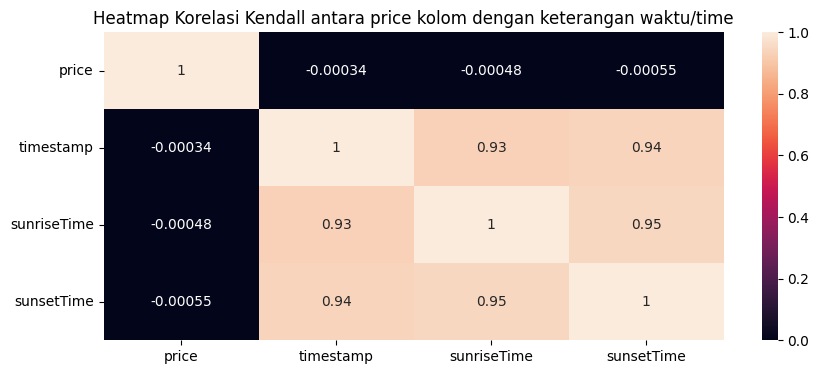

In [28]:
# Menggabungkan y_train dan X_train ke dataframe sementara
data_conc = pd.concat([y_train_clean, X_train_clean], axis=1)

#Ukuran grafik
plt.figure(figsize=(10, 4))

# Membuat heatmap uji korelasi
sns.heatmap(data_conc[['price', 'timestamp', 'sunriseTime', 'sunsetTime']].corr(method='kendall'), annot=True)

#Membuat judul heatmap
plt.title('Heatmap Korelasi Kendall antara price kolom dengan keterangan waktu/time')

#Menampikan grafik
plt.show()

#### **Insight**

Berdasarkan graph heatmap mendandakan bahwa kolom dengan keterangan waktu tidak mempunyai korelasi dengan price, sehingga semua kolom tersebut akan di hapus

### **Korelasi antara price dan kolom dengan kategori lokasi**

#### **Chart**

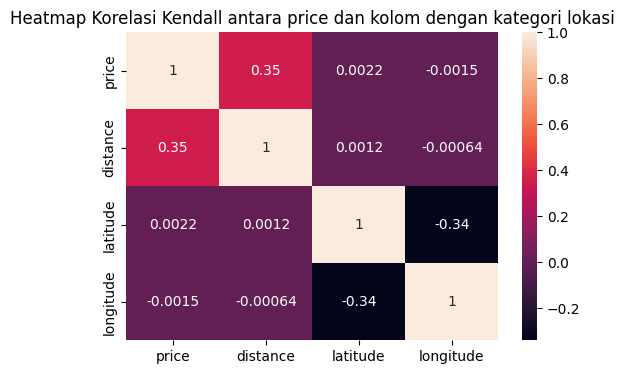

In [ ]:
#Ukuran grafik
fig = plt.figure(figsize=(6, 4))

# Membuat heatmap uji korelasi
sns.heatmap(data_conc[['price', 'distance', 'latitude', 'longitude']].corr(method='pearson'), annot=True)

#Membuat judul heatmap
plt.title('Heatmap Korelasi Kendall antara price dan kolom dengan kategori lokasi')

#Menampikan grafik
plt.show()

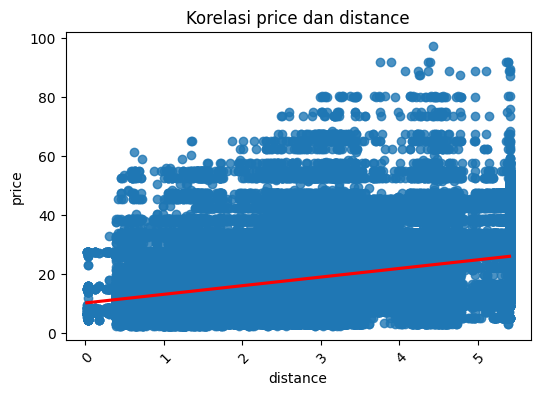

In [ ]:
#Ukuran grafik
fig = plt.figure(figsize=(6, 4))
sns.regplot(data=data_conc, x='distance', y='price', line_kws={"color": "red"})
plt.xticks(rotation=45, ha="right", wrap=True)

#Membuat judul chart
plt.title('Korelasi price dan distance')

#Menampikan grafik
plt.show()

### **Insight**

Berdasarkan heatmap ditemukan bahwa *distance* mempunyai korelasi dengan harga namun nilai korelasi nya rendah, namun ketika di lihat menggunakan visualisasi terdapat korelasi dimana ketika jarak makin jauh maka harga akan semakin tinggi sehingga dapat di ambil kesimpulan sebagai berikut :

| Nama Kolom | Insight |
|---------|---------|
|longitude| Tidak ada korelasi dengan kolom *price*, kolom akan di hapus|
|latitude| Tidak ada korelasi dengan kolom *price*, kolom akan di hapus|
|distance | korelasi ada, kolom akan di gunakan|

### **Korelasi antara price dan kolom dengan categori cuaca**

#### **Chart**

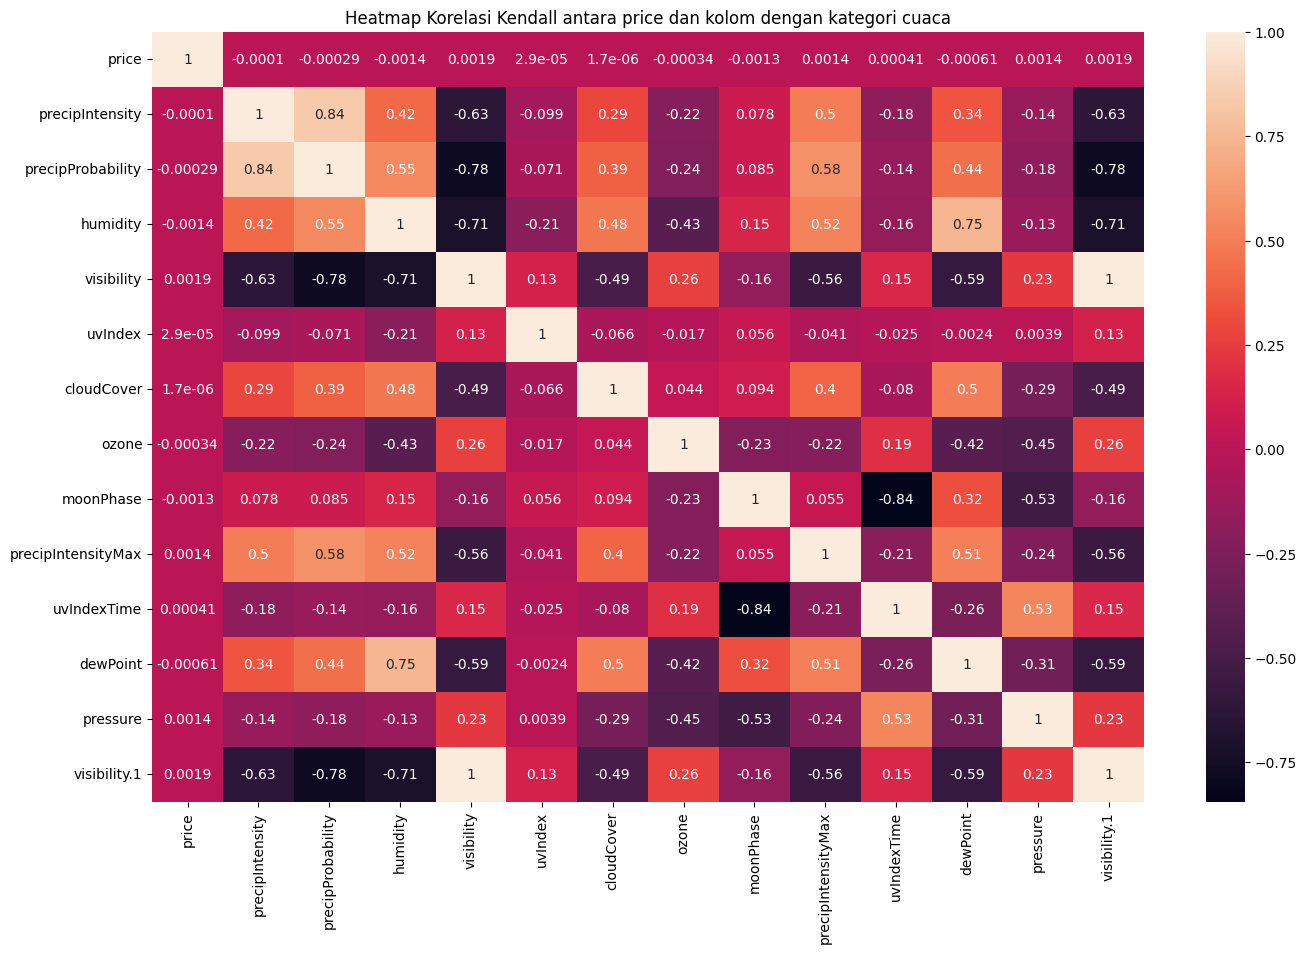

In [ ]:
#Ukuran grafik
fig = plt.figure(figsize=(16, 10))

# Membuat heatmap uji korelasi
sns.heatmap(data_conc[['price', 'precipIntensity', 'precipProbability', 'humidity', 'visibility',
    'uvIndex', 'cloudCover', 'ozone', 'moonPhase', 'precipIntensityMax',
    'uvIndexTime', 'dewPoint', 'pressure', 'visibility.1' ]].corr(method='pearson'), annot=True)

#Membuat judul heatmap
plt.title('Heatmap Korelasi Kendall antara price dan kolom dengan kategori cuaca')

#Menampikan grafik
plt.show()

#### **Insight**

Berdasarkan graph heatmap mendandakan bahwa kolom dengan keterangan cuaca tidak mempunyai korelasi dengan price, sehingga semua kolom tersebut akan di hapus

### **Korelasi antara price dan data dengan jenis kategori apparentTemperature**

#### **Chart**

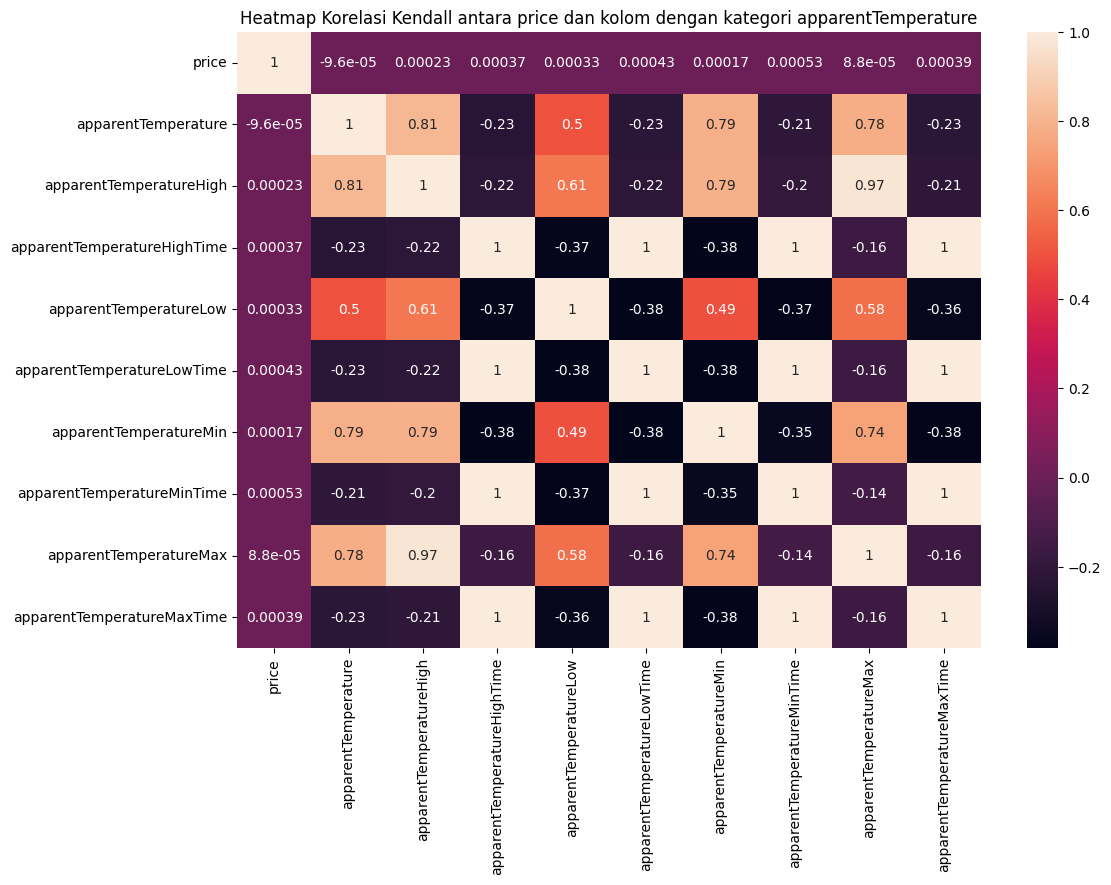

In [ ]:
#Ukuran grafik
fig = plt.figure(figsize=(12, 8))

# Membuat heatmap uji korelasi
sns.heatmap(data_conc[['price', 'apparentTemperature', 'apparentTemperatureHigh', 'apparentTemperatureHighTime',
    'apparentTemperatureLow', 'apparentTemperatureLowTime', 'apparentTemperatureMin',
    'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']].corr(method='pearson'), annot=True)

#Membuat judul heatmap
plt.title('Heatmap Korelasi Kendall antara price dan kolom dengan kategori apparentTemperature')

#Menampikan grafik
plt.show()

#### **Insight**

Berdasarkan graph heatmap mendandakan bahwa kolom dengan jenis kategori apparentTemperature tidak mempunyai korelasi dengan price, sehingga semua kolom tersebut akan di hapus

### **Korelasi antara price dan data dengan jenis kategori Temperature**

#### **Chart**

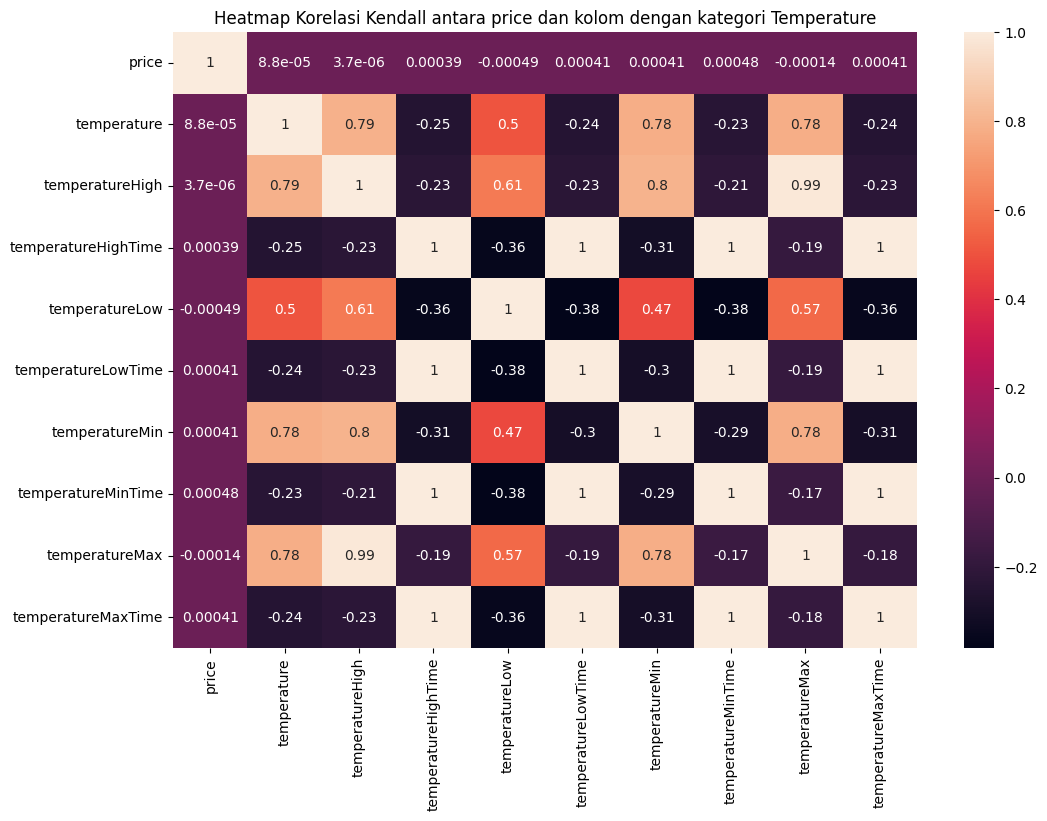

In [ ]:
#Ukuran grafik
fig = plt.figure(figsize=(12, 8))

# Membuat heatmap uji korelasi
sns.heatmap(data_conc[['price',  'temperature', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
    'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime']].corr(method='pearson'), annot=True)

#Membuat judul heatmap
plt.title('Heatmap Korelasi Kendall antara price dan kolom dengan kategori Temperature')

#Menampikan grafik
plt.show()

#### **Insight**

Berdasarkan graph heatmap mendandakan bahwa kolom dengan jenis kategori Temperature tidak mempunyai korelasi dengan price, sehingga semua kolom tersebut akan di hapus

### **Korelasi antara price dan data dengan jenis kategori wind/angin**

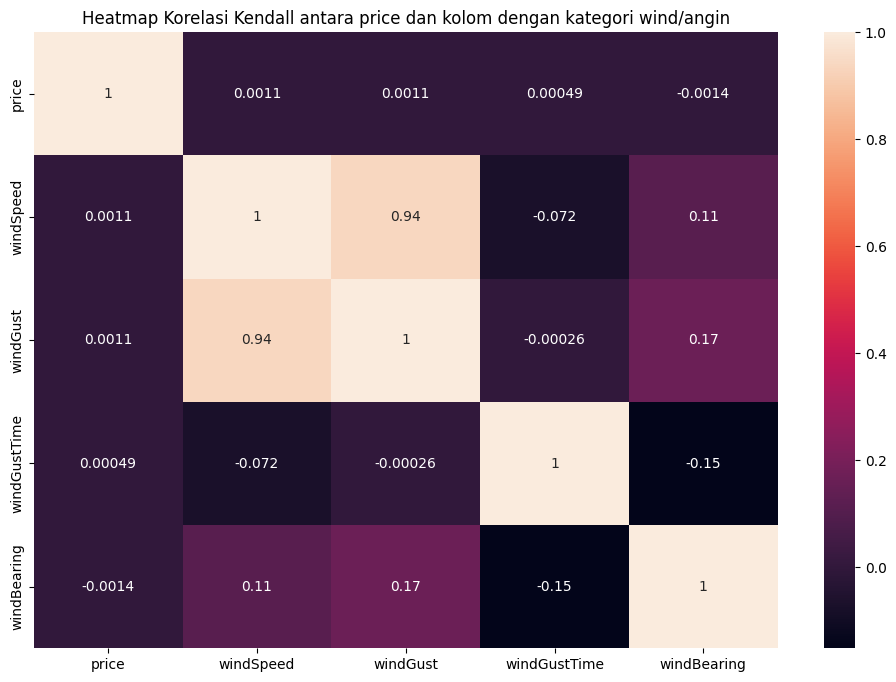

In [ ]:
#Ukuran grafik
fig = plt.figure(figsize=(12, 8))

# Membuat heatmap uji korelasi
sns.heatmap(data_conc[['price','windSpeed', 'windGust', 'windGustTime', 'windBearing']].corr(method='pearson'), annot=True)

#Membuat judul heatmap
plt.title('Heatmap Korelasi Kendall antara price dan kolom dengan kategori wind/angin')

#Menampikan grafik
plt.show()

#### **Insight**

Berdasarkan graph heatmap mendandakan bahwa kolom dengan jenis kategori Temperature tidak mempunyai korelasi dengan price, sehingga semua kolom tersebut akan di hapus

### **Korelasi antara price dan data kategori dengan jenis time**

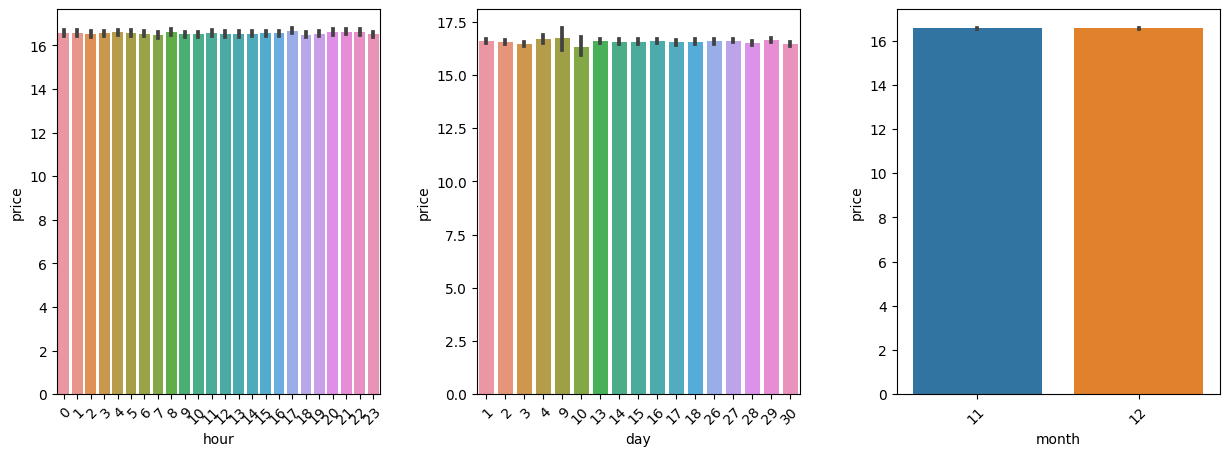

In [31]:
# Check the relationship between independent variables and dependent variable

fig = plt.figure(figsize=(15, 5))
cols = ['hour','day','month']
num_rows = 1
num_cols = 3

for index in range(1, num_rows*num_cols + 1):
  fig.add_subplot(num_rows, num_cols, index)
  sns.barplot(data=data_conc, x=cols[index-1], y='price')
  plt.xticks(rotation=45, ha="right", wrap=True)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

#### **Insight**


1.   Berdasarkan barplot bahwa kolom dengan keterangan waktu mempunyai rata-rata yang sama pada setiap jenis kategori sehingga menandakan bahawa tidak mempunyai korelasi terhadap harga, sehingga data ini akan di hapus
2.   Untuk kolom id dan datetime akan kita hapus karena id secara domain knowledge tidak mempunyai pengaruh terhadap price, sedangkan date time sudah di pisah menjadi hour, day, month sehingga untuk menghindari Multikolineariti





### **Korelasi antara price dan data kategori dengan jenis lokasi dan lonjakan harga**

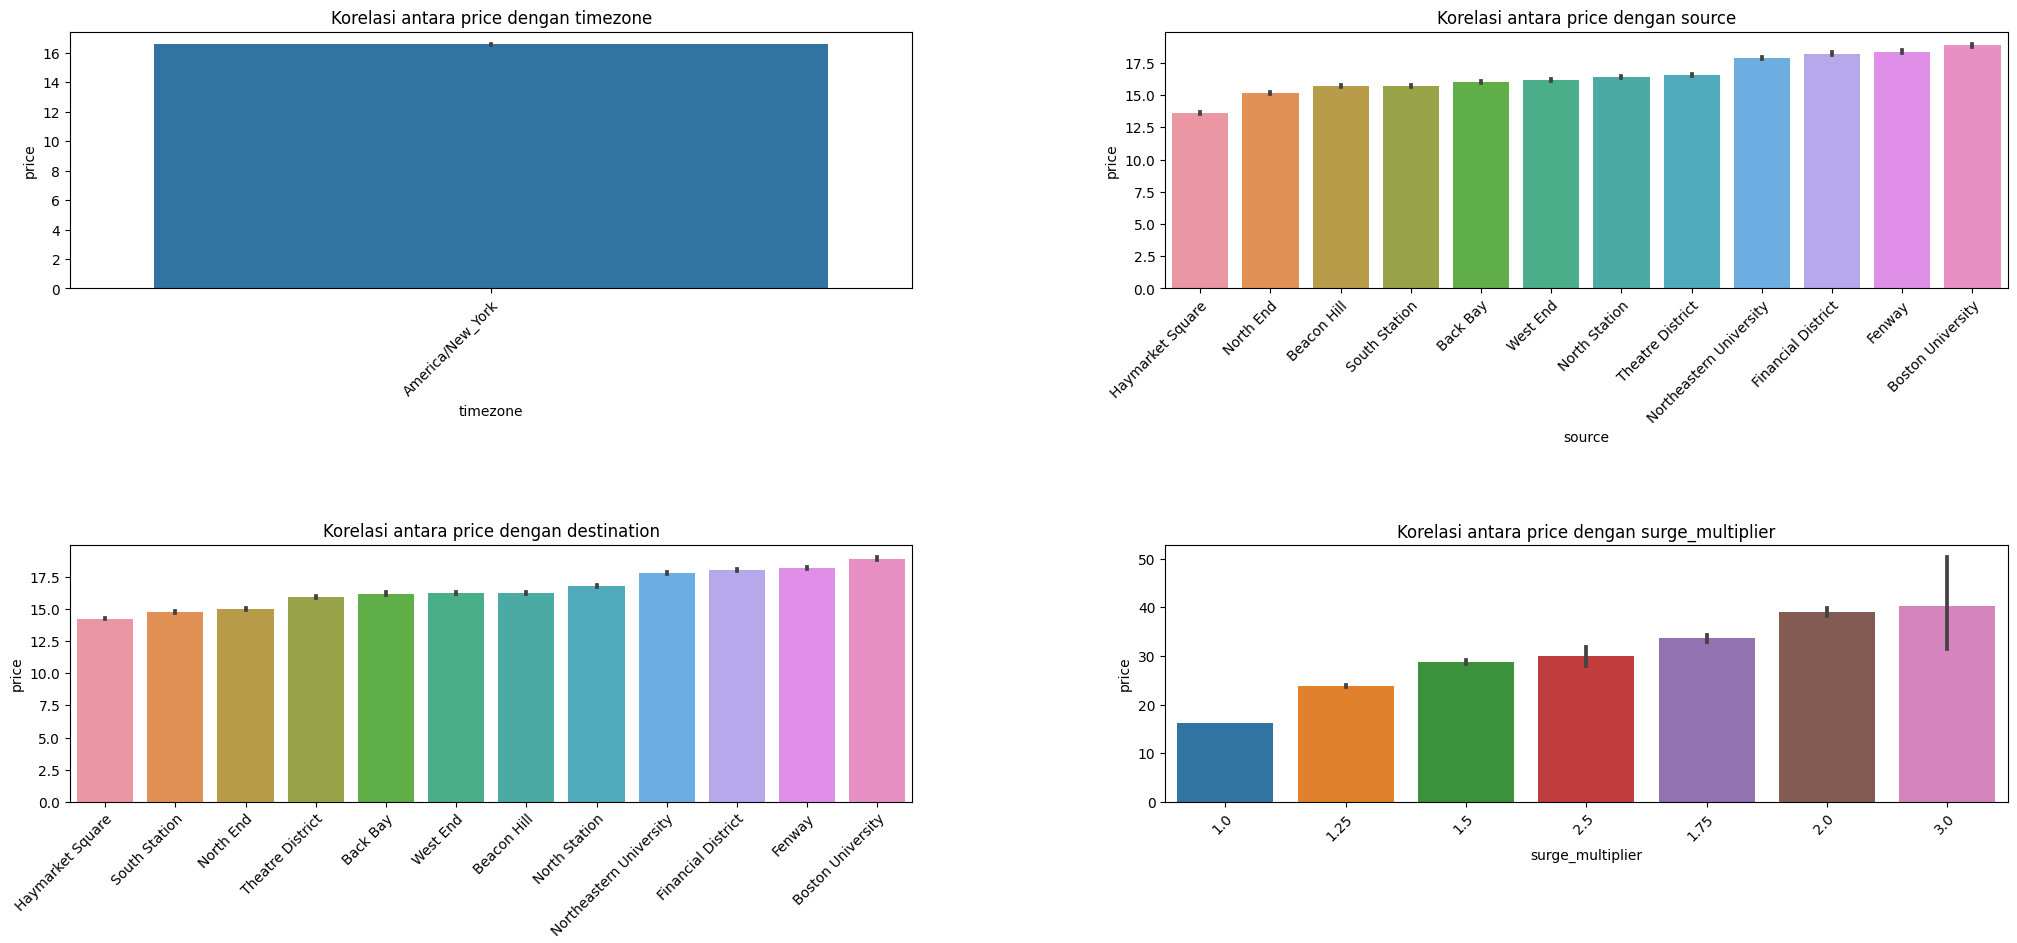

In [ ]:
# Check the relationship between independent variables and dependent variable

#Ukuran grafik
fig = plt.figure(figsize=(25, 10))

#List nama kolom yang akan di buatkan tabel korelasi
cols = ['timezone','source','destination', 'surge_multiplier']

#total baris grafik
num_rows = 2

#total kolom grafik
num_cols = 2


for index in range(1, num_rows*num_cols + 1):
  '''
  Looping untuk membuat grafik korelasi price dengan beberapa kolom
  '''

  #menambah subplot
  fig.add_subplot(num_rows, num_cols, index)

  #grouping data by category dan menghitung mean
  order = data_conc.groupby(cols[index-1])['price'].mean().sort_values().index

  #membuat barplot
  sns.barplot(data=data_conc, x=cols[index-1], y='price', order=order)

  #menyesuaikan bentuk tampilan axis x
  plt.xticks(rotation=45, ha="right", wrap=True)

  #Membuat judul heatmap
  plt.title(f'Korelasi antara price dengan {cols[index-1]}')

#mengatur jarak antar chart
plt.subplots_adjust(hspace=1, wspace=0.3)

#Menampilkan chart
plt.show()

#### **Insight**



1.   Berdasarkan barplot bahwa kolom souce, destination dan surge_multiplier mempunyai rata-rata price berbeda yang menandakan bahwa kolom tersebut mempunyai korelasi terhadap price sehingga kolom source, destination dan surge_multiplier akan di gunakan dalam model
2.   Sedangkan kolom timezone tidak mempunyai korelasi dengan harga karena value nya hanya satu, sehingga kolom timezone akan di hapus

### **Korelasi antara price dan data kategori dengan jenis layanan ride**

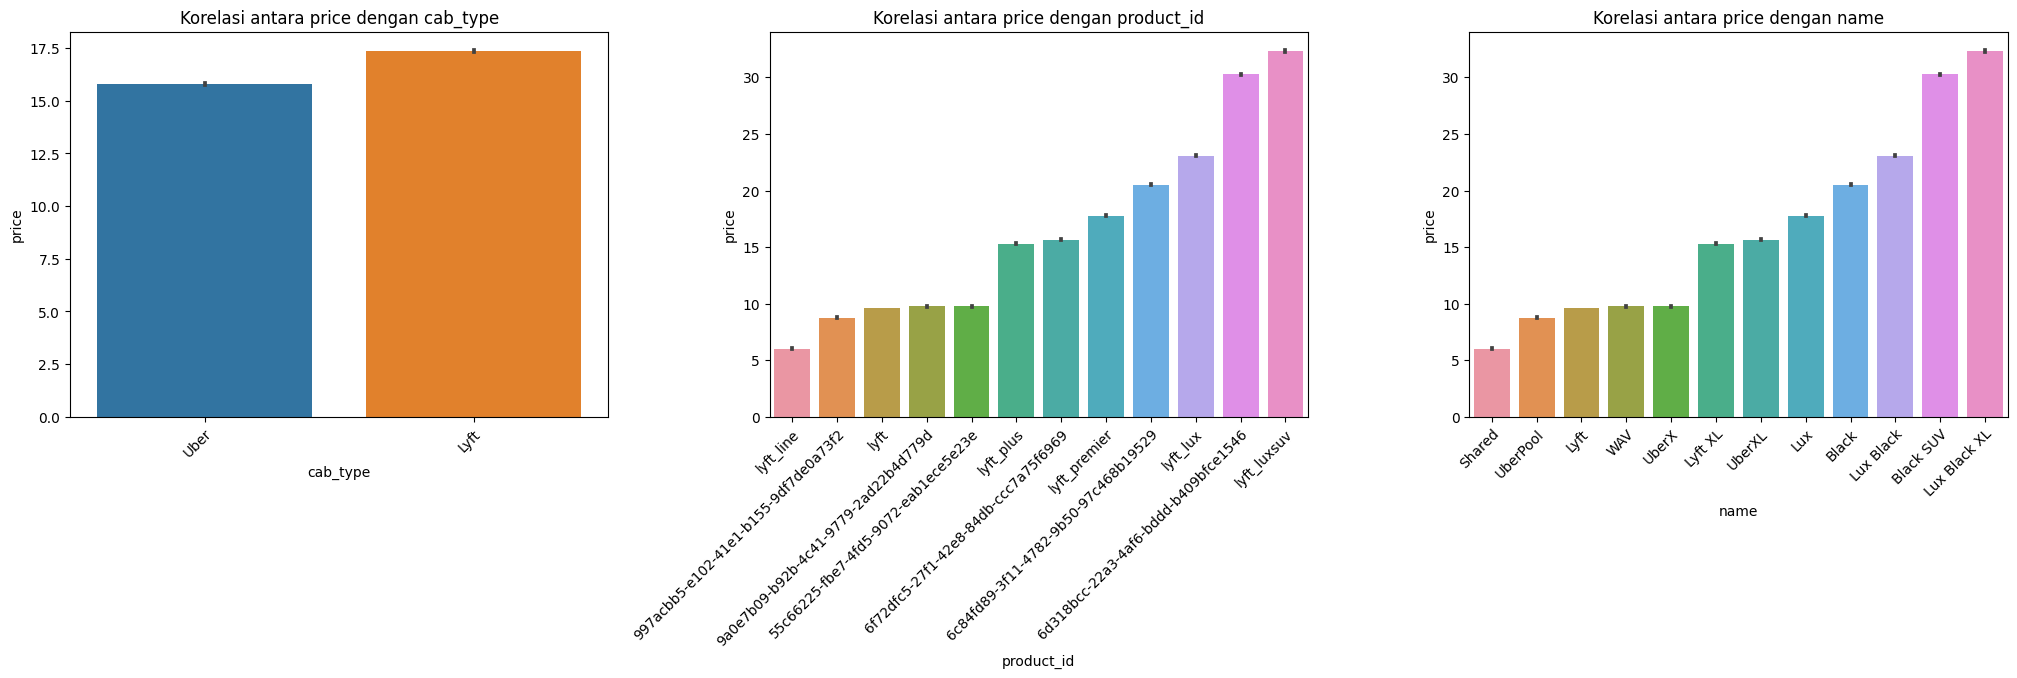

In [ ]:
# Check the relationship between independent variables and dependent variable

#Ukuran grafik
fig = plt.figure(figsize=(25, 5))

#List nama kolom yang akan di buatkan tabel korelasi
cols = ['cab_type','product_id', 'name']

#total baris grafik
num_rows = 1
#total kolom grafik
num_cols = 3


for index in range(1, num_rows*num_cols + 1):
  '''
  Looping untuk membuat grafik korelasi price dengan beberapa kolom
  '''
  #menambah subplot
  fig.add_subplot(num_rows, num_cols, index)

  #grouping data by category dan menghitung mean
  order = data_conc.groupby(cols[index-1])['price'].mean().sort_values().index

  #membuat barplot
  sns.barplot(data=data_conc, x=cols[index-1], y='price', order=order)

  #menyesuaikan bentuk tampilan axis x
  plt.xticks(rotation=45, ha="right", wrap=True)

  #Membuat judul heatmap
  plt.title(f'Korelasi antara price dengan {cols[index-1]}')

#mengatur jarak antar chart
plt.subplots_adjust(hspace=0.5, wspace=0.3)


#Menampilkan chart
plt.show()

#### **Insight**


1.   Berdasarkan barplot bahwa kolom cab_type dan name mempunyai rata-rata price berbeda yang menandakan bahwa kolom tersebut mempunyai korelasi terhadap price sehingga kolom akan di gunakan dalam model

2.   Sedangkan untuk kolom product_id akan di hapus karena nilai product_id bergantung terhadap name sehingga bisa di hapus

### **Korelasi antara price dan data kategori dengan jenis layanan summary dari cuaca**

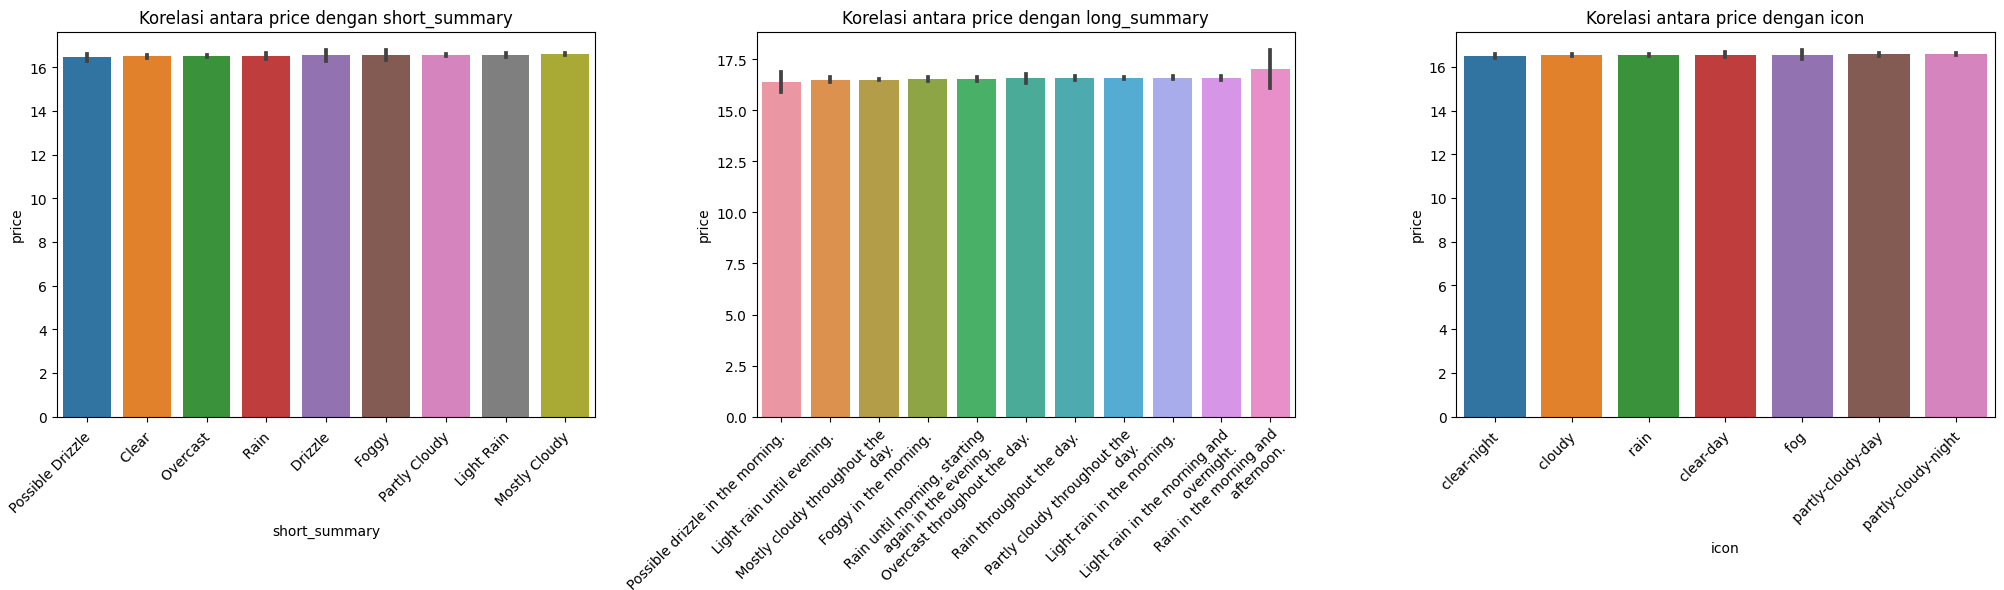

In [ ]:
#ukuran grafik
fig = plt.figure(figsize=(25, 5))

#List nama kolom yang akan di buatkan tabel korelasi
cols = ['short_summary','long_summary', 'icon']

#total baris grafik
num_rows = 1
#total kolom grafik
num_cols = 3

for index in range(1, num_rows*num_cols + 1):
  '''
  Looping untuk membuat grafik korelasi price dengan beberapa kolom
  '''
  #menambah subplot
  fig.add_subplot(num_rows, num_cols, index)

  #grouping data by category dan menghitung mean
  order = data_conc.groupby(cols[index-1])['price'].mean().sort_values().index

  #membuat barplot
  sns.barplot(data=data_conc, x=cols[index-1], y='price', order=order)

  #menyesuaikan bentuk tampilan axis x
  plt.xticks(rotation=45, ha="right", wrap=True)

  #Membuat judul heatmap
  plt.title(f'Korelasi antara price dengan {cols[index-1]}')

#mengatur jarak antar chart
plt.subplots_adjust(hspace=0.5, wspace=0.3)

#Menampilkan chart
plt.show()


#### **Insight**

Berdasarkan barplot bahwa kolom dengan shot_summary, long_summary dan icon mempunyai rata-rata yang sama pada setiap jenis kategori sehingga menandakan bahawa tidak mempunyai korelasi terhadap harga, sehingga data ini akan di hapus

### Data Final Linear

In [45]:
#Membuat data X_train final berdasarkan hasil uji korelasi
X_train_final = X_train_clean[['distance','surge_multiplier','source', 'destination', 'cab_type', 'name']]

#Membuat data y_test final berdasarkan hasil uji korelasi
X_test_final = X_test_clean[['distance','surge_multiplier','source', 'destination', 'cab_type', 'name']]

In [ ]:
# menampikan data
X_test_final

,distance,surge_multiplier,source,destination,cab_type,name
441132,1.89,1.0,Northeastern University,Theatre District,Uber,UberX
274010,1.97,1.0,Northeastern University,Theatre District,Lyft,Lyft XL
194181,1.23,1.0,North End,West End,Lyft,Lux
197807,4.28,1.0,Boston University,Financial District,Lyft,Lux
553729,2.34,1.0,North End,Back Bay,Uber,Black SUV
...,...,...,...,...,...,...
251723,2.58,1.0,South Station,Beacon Hill,Uber,UberPool
145644,0.55,1.0,Theatre District,South Station,Lyft,Lux Black
148136,1.20,1.0,North End,Financial District,Uber,UberX
284581,0.95,1.0,Haymarket Square,Beacon Hill,Lyft,Lux Black XL


## **Cardinality**

In [35]:
#menampikan total data uniq dari value di setiap kolom dataframe
X_train_final[['source', 'destination','cab_type','name']].nunique()

source         12
destination    12
cab_type        2
name           12
dtype: int64

### **Insight**

Tidak terdapat cardinality pada data final karena uniq value nya sedikit

## **No or Little Multicollinearity**

Kolom yang berbentuk numeric hanya kolom distance, sehingga tidak perlu mencari multicollinearity

## **Scaling Data Numeric & Endoding Data Categorical**

In [46]:
# menentukan nama kolom dengan tipe category ordinal
categorical_ordinal_cols = ['surge_multiplier']

# menentukan nama kolom dengan tipe category non ordinal
categorical_nominal_cols = ['source', 'destination', 'cab_type', 'name']

# menentukan nama kolom dengan tipe numeric
numeric_cols = ['distance']

# ColumnTransofrmer untuk melakukan  proses encoding data category dan scaling data numeric
preprocessor = ColumnTransformer(
    transformers=[

        #data dengan tipe category ordinal akan di pass karena data sudah berbentuk ordinal numeric
        ('cat_ordinal', 'passthrough', categorical_ordinal_cols),

        #Melakukan encoder data category di setiap kolom
        ('cat_nominal', OneHotEncoder(handle_unknown='ignore'), categorical_nominal_cols),

        #Melakukan scaller data numeric, karena mostly data mempunyai skewness sehingga kita akan menggunakan RobustScaler
        ('num', RobustScaler(), numeric_cols)
    ],

    #argumen untuk kolom yang tidak akan di transform
    remainder='passthrough'
)

# **Model Definition**

Model yang akan di gunakan adalah LinearRegression, namun pada uji normalitas beberapa data tidak mempunyai hubungan yang cukup kuat dengan data target sehingga kita akan menggunakan Polynomial Regression sebelum menggunakan LinearRegression untuk mendapatkan hasil yang bagus

In [51]:
# Pipeline untuk melakukan proses encoding, scaling dan juga menerapkan model machine learning
model = Pipeline([
    ('preprocessor', preprocessor), #proses encoding dan scaling
    ('poly', PolynomialFeatures(degree=2)), #MenggunakanPolynomial Regression
    ('regressor', LinearRegression()) #model Uji menggunakan LinearRegression
])

# Fit pipeline untuk melakukan proses encoding, scaling dan menerapkan model regresi linear kedalam data train
model.fit(X_train_final, y_train_clean)

# Fit pipeline untuk melakukan proses encoding, scaling dan menerapkan model regresi linear kedalam data test
model.fit(X_test_final, y_test_clean)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_ordinal', 'passthrough',
                                                  ['surge_multiplier']),
                                                 ('cat_nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['source', 'destination',
                                                   'cab_type', 'name']),
                                                 ('num', RobustScaler(),
                                                  ['distance'])])),
                ('poly', PolynomialFeatures()),
                ('regressor', LinearRegression())])

# **Model Training**

In [52]:
# Melakukan predict data train
y_pred_train = model.predict(X_train_final)

# Melakukan predict data test
y_pred_test = model.predict(X_test_final)

# **Model Evaluation**

### **R2 Score, MAE, MSE, RMSE**

In [54]:
# Create dictionary untuk menampung nilai dari uji model
eval_results = {
    'Evaluation Name': [],
    'MAE - Train': [],
    'MAE - Test': [],
    'MSE - Train': [],
    'MSE - Test': [],
    'RMSE - Train': [],
    'RMSE - Test': [],
    'R2 Score - Train': [],
    'R2 Score - Test': []
}


def model_evaluation(name, model, X_train_scaling, X_test_scaling, y_train_clean, y_test_clean):
  '''
  #Fungsi model yang akan menghitung nilai evaluasi terhadap model
  '''
  # menghitung mae
  mae_train = mean_absolute_error(y_train_clean, y_pred_train)
  mae_test = mean_absolute_error(y_test_clean, y_pred_test)

  # menghitung mse
  mse_train = mean_squared_error(y_train_clean, y_pred_train)
  mse_test = mean_squared_error(y_test_clean, y_pred_test)

  # menghitung rmse
  rmse_train = mean_squared_error(y_train_clean, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test_clean, y_pred_test, squared=False)

  # menghitung r2
  r2score_train = r2_score(y_train_clean, y_pred_train)
  r2score_test = r2_score(y_test_clean, y_pred_test)

  # menyimpan hasil uji kedalam dictionary
  eval_results['Evaluation Name'].append(name)
  eval_results['MAE - Train'].append(round(mae_train, 5))
  eval_results['MAE - Test'].append(round(mae_test, 5))
  eval_results['MSE - Train'].append(round(mse_train, 5))
  eval_results['MSE - Test'].append(round(mse_test, 5))
  eval_results['RMSE - Train'].append(round(rmse_train, 5))
  eval_results['RMSE - Test'].append(round(rmse_test, 5))
  eval_results['R2 Score - Train'].append(round(r2score_train, 5))
  eval_results['R2 Score - Test'].append(round(r2score_test, 5))

In [55]:
#Menjalankan fungsi model evaluation
model_evaluation('Linear Regression', model, X_train_final, X_test_final, y_train_clean, y_test_clean)

#Membuat dataframe yang menampung hasil model evaluation
eval_results_data = pd.DataFrame(eval_results)

#Set index kolom
eval_results_data.set_index('Evaluation Name').T

Evaluation Name,Linear Regression
MAE - Train,1.18151
MAE - Test,1.17261
MSE - Train,3.10752
MSE - Test,3.10008
RMSE - Train,1.76282
RMSE - Test,1.76071
R2 Score - Train,0.96427
R2 Score - Test,0.96428


### **Insight**

Berdasarkan hasil evaluasi R2 Score antara Train dan Test mempunyai selisih yang sangat kecil sehingga hasil dari model menandakan **Best Fit/Good Fit**

## **Multivariate Normality**

In [56]:
# Get residuals

y_test_residuals = y_test_clean - y_pred_test
y_test_residuals

441132   -1.594112
274010   -0.856269
194181   -0.277280
197807    1.810974
553729   -0.754766
            ...   
251723   -1.722829
145644    0.120002
148136    1.475840
284581    0.270395
292845   -1.399578
Name: price, Length: 127685, dtype: float64

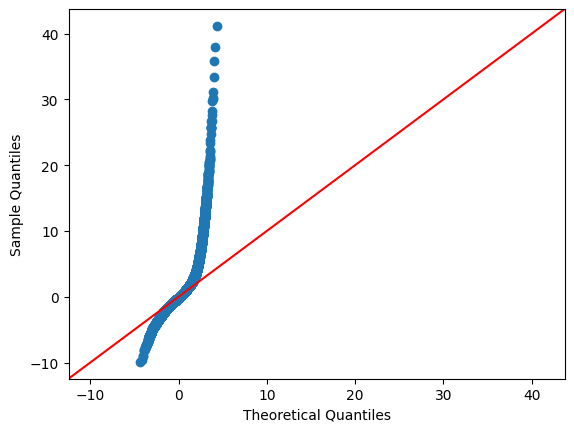

In [57]:
# Display QQ plot

import statsmodels.api as sm

sm.qqplot(y_test_residuals, line ='45')
plt.show()

### **Insight :**

Berdasarkan chart menandakan bahwa adanya problem karena hasil tidak linear yang memungkinkan adanya kehilangan suartu variabel dalam proses atau beberapa variabel tidak mempunyai hubungan yang linear

## **Homoscedasticity**

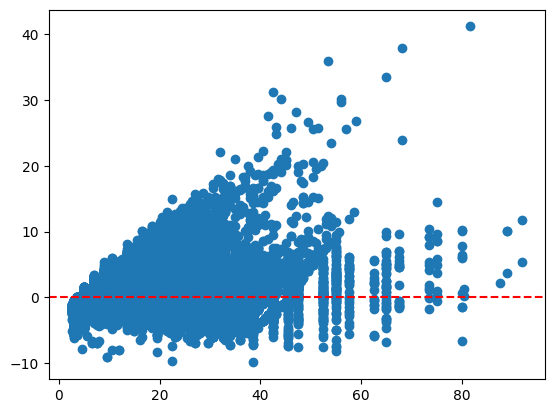

In [58]:
# Check homoscedasticioty

#membuat chart scatter
plt.scatter(y_test_clean, y_test_residuals)
#Style chart
plt.axhline(y = 0, color = 'r', linestyle = '--')

#Menampilkan chart
plt.show()

### Insight

residual dari model menujukan heteroscedasticity

## **No Auto-Correlation**

In [88]:
# Perform Durbin-Watson test

durbin_watson(y_test_residuals)

1.9985275333292147

###**Insight**

Tidak ada auto-correlation terhadap data dalam model

## **Slope dan Intercept**

In [96]:
# Check coefficients and intercept
intercept_poly = model.named_steps['regressor'].intercept_

#Print nilai intercept
print('Intercept : ', intercept_poly)

Intercept :  2.15861201134946


In [94]:
#membuat dataframe
coef_df_poly = pd.DataFrame(columns=['Feature', 'Coefficient'])

#Mendapatkan nama kolom
feature_names_poly = (
    categorical_ordinal_cols +
    list(model.named_steps['preprocessor'].named_transformers_['cat_nominal']
         .get_feature_names_out(categorical_nominal_cols)) +
    numeric_cols
)

# Mendapatkan koefisien dari model
coefficients_poly = model.named_steps['regressor'].coef_

# Menggabungkan nama kolom dan koefisien menggunakan zip
coefficients_with_names = list(zip(feature_names_poly, coefficients_poly))

# Membuat DataFrame baru
new_df = pd.DataFrame(coefficients_with_names, columns=['Feature', 'Coefficient'])

# Menggabungkan DataFrame baru dengan DataFrame awal
coef_df_poly = pd.concat([coef_df_poly, new_df], ignore_index=True)


In [95]:
coef_df_poly

,Feature,Coefficient
0,surge_multiplier,5.027503e-12
1,source_Back Bay,8.089387e+00
2,source_Beacon Hill,-5.753354e-02
3,source_Boston University,-3.473718e-02
4,source_Fenway,-4.131074e-01
5,source_Financial District,-5.277233e-01
6,source_Haymarket Square,2.593031e-01
7,source_North End,3.484947e-01
8,source_North Station,5.473742e-01
9,source_Northeastern University,1.254632e-01


### **Insight**



1.   Intercept :  2.1586 sehingga ini adalah harga dasar dari penentuan harga dalam proses prediksi selanjutnya ketika semua variable dependent nya 0
2.   coefficient positif menandakan bahwa variabel memiliki pengaruh yang signifikan terhadap harga
3. Coeffecient negatif menandakan bahwa variabel tidak memiliki pengaruh signifikan terhadap harga

# **Model Inference**

## Mengambil random data untuk model interference

In [81]:
#Membuat Random Data dari dataframe X_train_new
random_data = {
    col: X_train_final[col].sample(n=10, random_state=42).values
    for col in X_train_final.columns
}

#Menampung hasil random data ke dataframe
data_intf = pd.DataFrame(random_data)

In [82]:
#Menampilkan random dataframe
data_intf

,distance,surge_multiplier,source,destination,cab_type,name
0,1.80,1.0,Theatre District,Northeastern University,Uber,UberXL
1,1.25,1.0,Financial District,Haymarket Square,Uber,WAV
2,1.57,1.0,Theatre District,North End,Uber,Black
3,2.80,1.0,West End,Boston University,Uber,UberX
4,2.17,1.0,North Station,South Station,Uber,UberXL
5,2.50,1.0,South Station,Beacon Hill,Uber,WAV
6,1.22,1.0,Back Bay,Northeastern University,Uber,Black
7,3.04,1.0,Boston University,West End,Uber,WAV
8,3.05,1.0,West End,Northeastern University,Lyft,Lux Black
9,3.27,1.0,Fenway,North Station,Lyft,Lux Black XL


## Predict Data

In [83]:
y_pred_inf = model.predict(data_intf)

## Result Prediction

In [84]:
#Memasukan hasil predict ke dataframe random
data_intf['price prediction'] = y_pred_inf

#Menampilkan dataframe
data_intf.head(20).round(2)

,distance,surge_multiplier,source,destination,cab_type,name,price prediction
0,1.80,1.0,Theatre District,Northeastern University,Uber,UberXL,15.30
1,1.25,1.0,Financial District,Haymarket Square,Uber,WAV,7.63
2,1.57,1.0,Theatre District,North End,Uber,Black,17.82
3,2.80,1.0,West End,Boston University,Uber,UberX,10.71
4,2.17,1.0,North Station,South Station,Uber,UberXL,14.48
5,2.50,1.0,South Station,Beacon Hill,Uber,WAV,10.47
6,1.22,1.0,Back Bay,Northeastern University,Uber,Black,16.07
7,3.04,1.0,Boston University,West End,Uber,WAV,10.25
8,3.05,1.0,West End,Northeastern University,Lyft,Lux Black,26.03
9,3.27,1.0,Fenway,North Station,Lyft,Lux Black XL,36.46


In [85]:
#Menampilkan detail statistik descriptive
data_intf.describe().round(2)

,distance,surge_multiplier,price prediction
count,10.00,10.0,10.00
mean,2.27,1.0,16.52
std,0.77,0.0,8.72
min,1.22,1.0,7.63
25%,1.63,1.0,10.53
50%,2.34,1.0,14.89
75%,2.98,1.0,17.38
max,3.27,1.0,36.46


# **Pengambilan Kesimpulan**

1. Model yang di buat menghasilkan hasil uji yang good fit dengan R2 Score pada train dan test sebesar 0.96 atau keberhasilan model di train dan test dalam memprediksi harga sebanyak 96%
2. Intercept :  2.1586 sehingga ini adalah harga dasar dari penentuan harga dalam proses prediksi selanjutnya ketika semua variable dependent nya 0
3. berdasarkan uji Multivariate Normality di temukan masih ada beberapa kesalahan seperti adanya kemungkinan hilang nya variabel penting atau beberapa variabel tidak mempunyai hubungan yang linear dengan data target
4. Dataset ini mempunyai banyak data yang mempunyai linearitas yang rendah terhadap target, sehingga perlu untuk mencari model regresi yang lain
5. Selanjutnya bisa melakukan uji perbandingan menggunakan lasso Regression atau ridge Regression untuk mengurangi kekurangan dari model yang sudah di lakukan